In [1]:
from google.colab import files
file_uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vgames = pd.read_csv('vgames2.csv')
df = vgames.copy()
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 결측치 제거...

df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [7]:
#pd.set_option('display.max_rows', None)

In [8]:
# Year 칼럼 변환

def convert_year(x):
  if x >= 0 and x <= 16:
    return int(2000 + x)
  elif x > 16 and x < 1980:
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(convert_year)

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16241 non-null  int64 
 1   Name         16241 non-null  object
 2   Platform     16241 non-null  object
 3   Year         16241 non-null  int64 
 4   Genre        16241 non-null  object
 5   Publisher    16241 non-null  object
 6   NA_Sales     16241 non-null  object
 7   EU_Sales     16241 non-null  object
 8   JP_Sales     16241 non-null  object
 9   Other_Sales  16241 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [10]:
# Salse 칼럼 변환
df['NA_Sales'] = df['NA_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).apply(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).apply(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).apply(pd.eval)
df['Other_Sales'] = df['Other_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).apply(pd.eval)

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


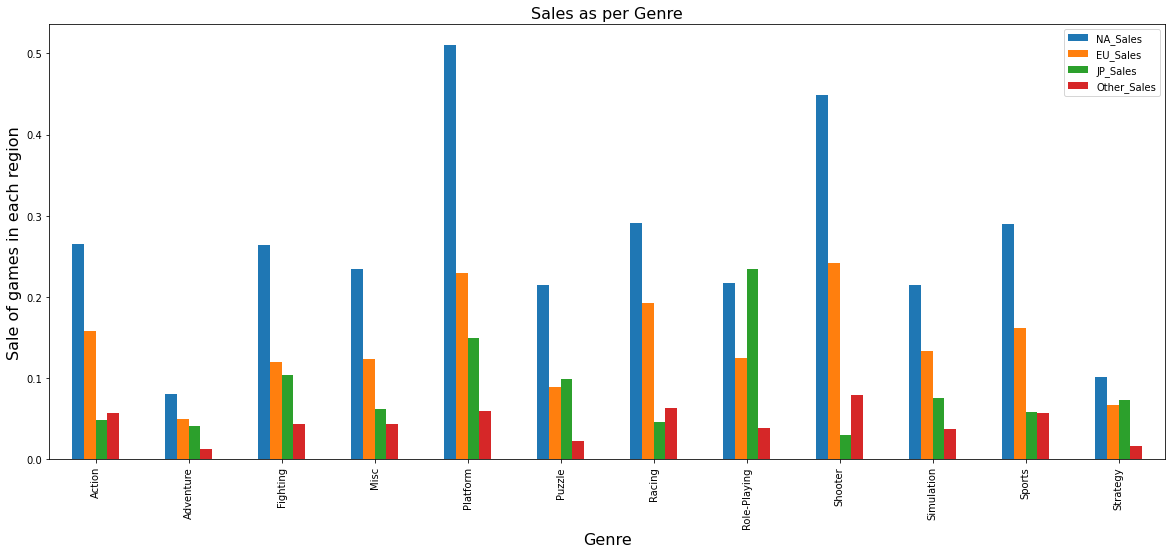

In [11]:
# 지역에 따라서 선호하는 게임 장르

df_01 = df.groupby(['Genre'])
val = df_01[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(np.mean)

val.plot(kind='bar',figsize=(20,8))
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per Genre',fontsize=16);

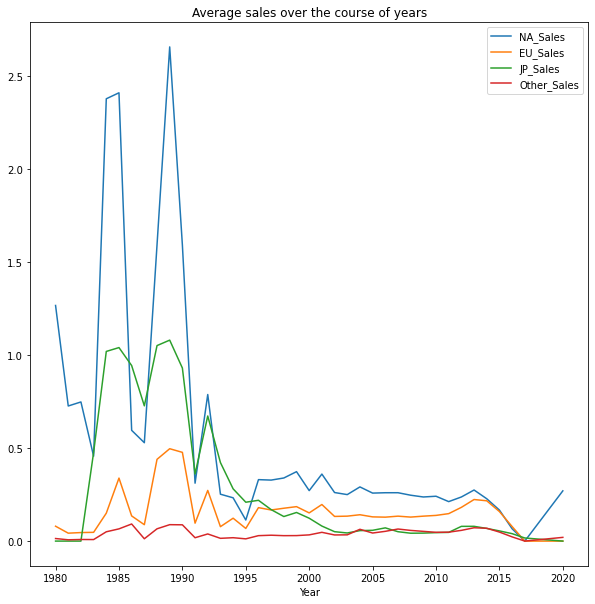

In [12]:
# 연도별 게임의 트렌드

df_02 = df.groupby(['Year'])
df_02_mean = df_02[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(np.mean)

df_02_mean.plot(figsize=(10,10))
plt.title('Average sales over the course of years');

In [13]:
pip install plotly --upgrade

In [14]:
# 출고량이 높은 게임에 대한 분석

import plotly.express as px

df_03 = df.groupby('Name')[['Total_Sales', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values('Total_Sales', ascending = False)[:10]

fig = px.bar(df_03,
             labels={
                     "variable": "Region",
                     "value": "Sales(in Million)",
                     "Name": "Game"},
            title = 'Top Grossing Game in different Region')
fig.update_layout(
    title={'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.update
fig.show(renderer="colab")